# Program Sistem Klasifikasi Unggas Menggunakan Convolutional Neural Network (CNN) Menggunakan Bahasa Pemrograman Python Jupyter Notebook


Pertama, import library yang dibutuhkan.

In [1]:
# Library yang dibutuhkan

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import glob
import time
import cv2
import os 

%matplotlib inline


In [2]:
# Panggil Dataset (Data Latih)
# Urutan Data Unggas
# ayam
# entok
# dara

# Panggil Dataset (Data Latih)
dir_ayam = "./Dataset/training-data/ayam/*.jpg"
dir_entok = "./Dataset/training-data/entok/*.jpg"
dir_dara = "./Dataset/training-data/dara/*.jpg"

image_size = (100, 100)  # Define the desired image size

# Function to load and resize images
def load_and_resize_images(file_paths, image_size):
    images = []
    for file_path in file_paths:
        img = cv2.imread(file_path)
        img = cv2.resize(img, image_size)  # Resize the image
        images.append(img)
    return images

files = glob.glob(dir_ayam)
ayam = load_and_resize_images(files, image_size)

files = glob.glob(dir_entok)
entok = load_and_resize_images(files, image_size)

files = glob.glob(dir_dara)
dara = load_and_resize_images(files, image_size)

# Panggil Dataset (Data Uji)
dir_ayam_uji = "./Dataset/testing-data/ayam/*.jpg"
dir_entok_uji = "./Dataset/testing-data/entok/*.jpg"
dir_dara_uji = "./Dataset/testing-data/dara/*.jpg"

files = glob.glob(dir_ayam_uji)
ayam_uji = load_and_resize_images(files, image_size)

files = glob.glob(dir_entok_uji)
entok_uji = load_and_resize_images(files, image_size)

files = glob.glob(dir_dara_uji)
dara_uji = load_and_resize_images(files, image_size)

In [3]:
# Cek ukuran Data latih
[np.shape(ayam), np.shape(entok), np.shape(dara)]

[(40, 100, 100, 3), (40, 100, 100, 3), (40, 100, 100, 3)]

In [4]:
# Cek ukuran Data Uji
[np.shape(ayam_uji), np.shape(entok_uji), np.shape(dara_uji)]

[(10, 100, 100, 3), (10, 100, 100, 3), (10, 100, 100, 3)]

In [5]:
# Data Latih semua jenis unggas digabung
X = np.vstack((ayam, entok, dara)).astype(np.float32)                      

In [6]:
# Cek ukuran Data Latih setelah digabung
X.shape

(120, 100, 100, 3)

In [7]:
# Tampilkan sebelum dinormalisasi
print(X)

[[[[163. 179. 186.]
   [164. 180. 187.]
   [168. 181. 189.]
   ...
   [176. 188. 194.]
   [176. 188. 194.]
   [177. 189. 195.]]

  [[163. 179. 186.]
   [165. 181. 188.]
   [169. 182. 190.]
   ...
   [175. 187. 193.]
   [176. 188. 194.]
   [177. 189. 195.]]

  [[164. 180. 187.]
   [166. 182. 189.]
   [170. 183. 191.]
   ...
   [175. 187. 193.]
   [176. 188. 194.]
   [177. 189. 195.]]

  ...

  [[177. 167. 156.]
   [178. 168. 157.]
   [175. 169. 158.]
   ...
   [168. 162. 160.]
   [161. 157. 157.]
   [158. 155. 154.]]

  [[176. 167. 157.]
   [176. 168. 158.]
   [173. 168. 157.]
   ...
   [172. 169. 160.]
   [169. 167. 158.]
   [169. 167. 158.]]

  [[176. 167. 157.]
   [175. 169. 158.]
   [172. 168. 157.]
   ...
   [168. 173. 158.]
   [167. 172. 157.]
   [169. 174. 159.]]]


 [[[ 92. 119. 153.]
   [ 94. 121. 155.]
   [ 96. 124. 158.]
   ...
   [ 90. 116. 146.]
   [ 87. 113. 143.]
   [ 86. 112. 142.]]

  [[ 92. 119. 153.]
   [ 94. 121. 155.]
   [ 96. 124. 158.]
   ...
   [ 91. 117. 147.]
 

In [8]:
# Data Latih semua jenis unggas Dinormalisasi

X = X / 255.0


In [9]:
X.shape

(120, 100, 100, 3)

In [10]:
len(ayam)

40

In [11]:
# Tampilkan setelah dinormalisasi
print(X)

[[[[0.6392157  0.7019608  0.7294118 ]
   [0.6431373  0.7058824  0.73333335]
   [0.65882355 0.70980394 0.7411765 ]
   ...
   [0.6901961  0.7372549  0.7607843 ]
   [0.6901961  0.7372549  0.7607843 ]
   [0.69411767 0.7411765  0.7647059 ]]

  [[0.6392157  0.7019608  0.7294118 ]
   [0.64705884 0.70980394 0.7372549 ]
   [0.6627451  0.7137255  0.74509805]
   ...
   [0.6862745  0.73333335 0.75686276]
   [0.6901961  0.7372549  0.7607843 ]
   [0.69411767 0.7411765  0.7647059 ]]

  [[0.6431373  0.7058824  0.73333335]
   [0.6509804  0.7137255  0.7411765 ]
   [0.6666667  0.7176471  0.7490196 ]
   ...
   [0.6862745  0.73333335 0.75686276]
   [0.6901961  0.7372549  0.7607843 ]
   [0.69411767 0.7411765  0.7647059 ]]

  ...

  [[0.69411767 0.654902   0.6117647 ]
   [0.69803923 0.65882355 0.6156863 ]
   [0.6862745  0.6627451  0.61960787]
   ...
   [0.65882355 0.63529414 0.627451  ]
   [0.6313726  0.6156863  0.6156863 ]
   [0.61960787 0.60784316 0.6039216 ]]

  [[0.6901961  0.654902   0.6156863 ]
   [0.6

In [12]:
# Data Uji semua jenis uggas digabung
X_uji = np.vstack((np.array(ayam_uji), np.array(entok_uji), np.array(dara_uji))).astype(np.float32)            


In [13]:
# Cek ukuran Data Uji
X_uji.shape

(30, 100, 100, 3)

In [14]:
# Data Uji sebelum dinormalisasi
print(X_uji)

[[[[127. 127. 127.]
   [128. 128. 128.]
   [129. 130. 128.]
   ...
   [ 91. 103. 107.]
   [ 83.  95.  99.]
   [ 77.  89.  93.]]

  [[129. 129. 128.]
   [130. 131. 130.]
   [132. 133. 131.]
   ...
   [ 87. 100. 105.]
   [ 79.  92.  97.]
   [ 73.  86.  91.]]

  [[131. 132. 130.]
   [134. 134. 132.]
   [136. 136. 135.]
   ...
   [ 84.  98. 104.]
   [ 76.  90.  96.]
   [ 70.  84.  90.]]

  ...

  [[ 29.  32.  30.]
   [ 32.  35.  33.]
   [ 37.  39.  39.]
   ...
   [154. 152. 142.]
   [151. 149. 139.]
   [150. 148. 138.]]

  [[ 28.  31.  29.]
   [ 31.  34.  32.]
   [ 37.  39.  39.]
   ...
   [154. 151. 141.]
   [151. 149. 139.]
   [150. 148. 138.]]

  [[ 28.  31.  29.]
   [ 31.  34.  32.]
   [ 37.  39.  39.]
   ...
   [153. 151. 141.]
   [151. 149. 139.]
   [150. 148. 138.]]]


 [[[118. 123. 121.]
   [121. 126. 124.]
   [125. 130. 128.]
   ...
   [147. 162. 165.]
   [144. 159. 162.]
   [142. 157. 160.]]

  [[118. 123. 121.]
   [121. 126. 124.]
   [125. 130. 128.]
   ...
   [148. 163. 166.]
 

In [15]:
# Data Uji semua jenis unggas Dinormalisasi

X_uji = X_uji / 255.0


In [16]:
# Cek setelah dinormalisasi
print(X_uji)

[[[[0.49803922 0.49803922 0.49803922]
   [0.5019608  0.5019608  0.5019608 ]
   [0.5058824  0.50980395 0.5019608 ]
   ...
   [0.35686275 0.40392157 0.41960785]
   [0.3254902  0.37254903 0.3882353 ]
   [0.3019608  0.34901962 0.3647059 ]]

  [[0.5058824  0.5058824  0.5019608 ]
   [0.50980395 0.5137255  0.50980395]
   [0.5176471  0.52156866 0.5137255 ]
   ...
   [0.34117648 0.39215687 0.4117647 ]
   [0.30980393 0.36078432 0.38039216]
   [0.28627452 0.3372549  0.35686275]]

  [[0.5137255  0.5176471  0.50980395]
   [0.5254902  0.5254902  0.5176471 ]
   [0.53333336 0.53333336 0.5294118 ]
   ...
   [0.32941177 0.38431373 0.40784314]
   [0.29803923 0.3529412  0.3764706 ]
   [0.27450982 0.32941177 0.3529412 ]]

  ...

  [[0.11372549 0.1254902  0.11764706]
   [0.1254902  0.13725491 0.12941177]
   [0.14509805 0.15294118 0.15294118]
   ...
   [0.6039216  0.59607846 0.5568628 ]
   [0.5921569  0.58431375 0.54509807]
   [0.5882353  0.5803922  0.5411765 ]]

  [[0.10980392 0.12156863 0.11372549]
   [0.1

In [17]:
# Label unggas Data Latih
label_ayam    = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
label_entok   = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
label_dara    = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# Cek ukuran label Data Latih
[np.shape(label_ayam), np.shape(label_entok), np.shape(label_dara)]

[(40,), (40,), (40,)]

In [19]:
# Semua Label Unggas Data Latih digabung
y = np.hstack((label_ayam, label_entok, label_dara))

In [20]:
# Cek ukuran label unggas Data Latih
y.shape

(120,)

In [21]:
# Label unggas Data Uji
label_ayam_uji    = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
label_entok_uji = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
label_dara_uji    = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# Cek ukuran label Data Uji
[np.shape(label_ayam_uji), np.shape(label_entok_uji), np.shape(label_dara_uji)]

[(10,), (10,), (10,)]

In [23]:
# Semua Label Unggas Data Uji digabung
y_uji = np.hstack((label_ayam_uji, label_entok_uji, label_dara_uji))

In [24]:
# Cek ukuran label unggas Data Uji
y_uji.shape

(30,)

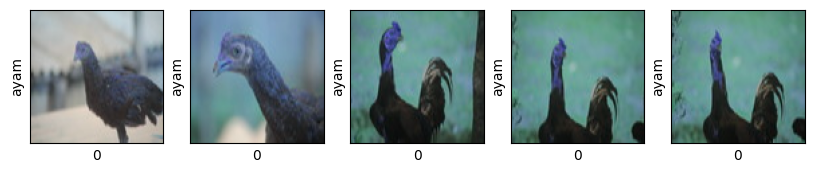

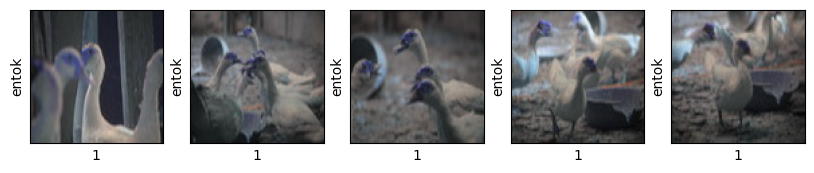

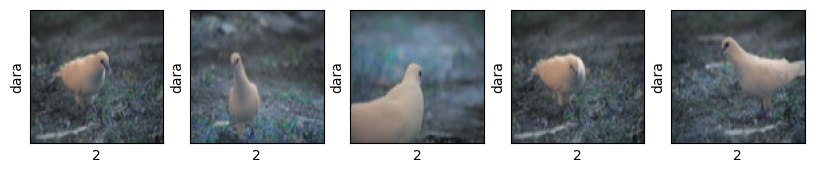

In [25]:
# Tampilkan sampel Data Latih

class_names = ['ayam', 'entok','dara']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ayam[i], cmap=plt.cm.binary)
    plt.xlabel(label_ayam[i])
    plt.ylabel(class_names[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(entok[i], cmap=plt.cm.binary)
    plt.xlabel(label_entok[i])
    plt.ylabel(class_names[1])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dara[i], cmap=plt.cm.binary)
    plt.xlabel(label_dara[i])
    plt.ylabel(class_names[2])
plt.show()



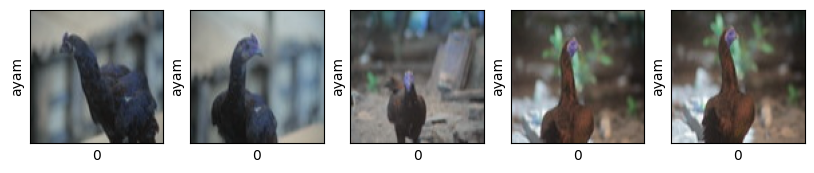

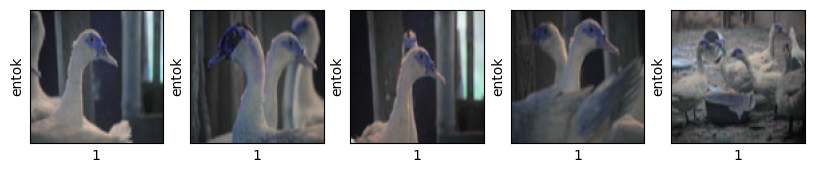

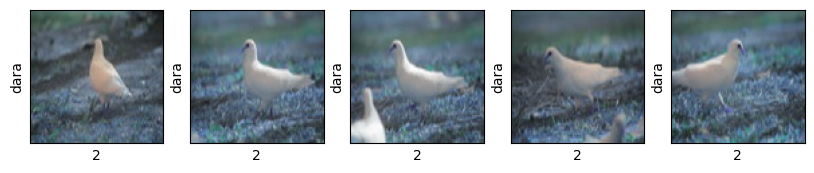

In [26]:
# Tampilkan sampel Data Uji

class_names = ['ayam', 'entok','dara']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ayam_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_ayam_uji[i])
    plt.ylabel(class_names[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(entok_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_entok_uji[i])
    plt.ylabel(class_names[1])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dara_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_dara_uji[i])
    plt.ylabel(class_names[2])
plt.show()


Buat basis konvolusional
10 baris kode di bawah ini mendefinisikan dasar convolutional menggunakan pola umum: setumpuk Conv2D dan MaxPooling2D lapisan.

Sebagai masukan, CNN mengambil bentuk tensor (tinggi_gambar, lebar_gambar, saluran_warna), mengabaikan ukuran tumpukan. Color_channels merujuk ke (R, G, B). CNN untuk memproses masukan dalam bentuk (100, 100, 3), sesuai Data Latih yang digunakan. Dapat dilakukan dengan meneruskan argumen input_shape ke lapisan pertama kita.

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))

Mari kita tampilkan arsitektur model kita sejauh ini.

In [28]:
# Menampilkan arsitektur model CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 200)       360200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 200)      0

Di atas, dapat dilihat bahwa output dari setiap lapisan Conv2D dan MaxPooling2D adalah bentuk tensor 3D (tinggi, lebar, saluran). Dimensi lebar dan tinggi cenderung menyusut saat Anda masuk lebih dalam di jaringan. Biasanya, saat lebar dan tinggi menyusut, Anda dapat (secara komputasi) untuk menambahkan lebih banyak saluran keluaran di setiap lapisan Konv2D.

Tambahkan lapisan padat di atas untuk melengkapi model kita. Dapat dimasukkan tensor keluaran terakhir dari basis konvolusional (berbentuk (2, 2, 200)) ke dalam satu atau lebih lapisan Padat untuk melakukan klasifikasi. Lapisan padat mengambil vektor sebagai masukan (yaitu 1D), sedangkan keluaran saat ini adalah tensor 3D. Pertama, Anda akan meratakan (atau membuka gulungan) keluaran 3D ke 1D, lalu menambahkan satu atau lebih lapisan Padat di atasnya. Sitem memiliki 5 kelas keluaran, jadi digunakan lapisan Dense akhir dengan 5 keluaran.

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(5))

Berikut arsitektur lengkap model kami.

In [30]:
# menampilkan arsitektur lengkap model CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 200)       360200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 200)      0

Seperti yang Anda lihat, keluaran (2, 2, 200) kita diratakan menjadi vektor bentuk (800) sebelum melewati dua layer Dense.

Kumpulkan dan latih modelnya

In [31]:
# Kumpulkan dan latih modelnya
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X, y, epochs=20, 
                    validation_data=(X_uji, y_uji))

Epoch 1/20
4/4 [==============================] - 4s 743ms/step - loss: 1.4122 - accuracy: 0.2500 - val_loss: 1.3276 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 3s 642ms/step - loss: 1.2298 - accuracy: 0.3333 - val_loss: 1.2396 - val_accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 3s 694ms/step - loss: 1.2201 - accuracy: 0.3333 - val_loss: 1.1248 - val_accuracy: 0.3333
Epoch 4/20
4/4 [==============================] - 3s 662ms/step - loss: 1.0692 - accuracy: 0.4500 - val_loss: 1.1716 - val_accuracy: 0.3333
Epoch 5/20
4/4 [==============================] - 3s 642ms/step - loss: 1.1029 - accuracy: 0.4417 - val_loss: 1.0532 - val_accuracy: 0.4333
Epoch 6/20
4/4 [==============================] - 2s 627ms/step - loss: 1.0759 - accuracy: 0.4833 - val_loss: 1.0319 - val_accuracy: 0.3000
Epoch 7/20
4/4 [==============================] - 3s 652ms/step - loss: 1.0731 - accuracy: 0.4167 - val_loss: 1.0480 - val_accuracy: 0.3333
Epoch 8/20
4/4 [====

Tampilkan dalam bentuk grafik

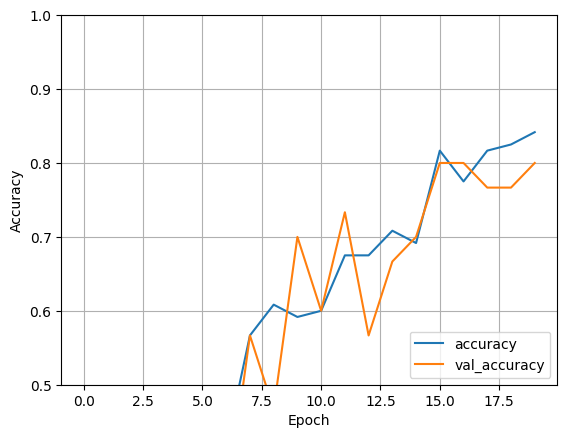

In [32]:
# Tampilkan grafik hasil pelatihan CNN dan validasi dengan Data Uji
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid()

In [33]:
# Evaluasi modelnya
test_loss, test_acc = model.evaluate(X_uji,  y_uji, verbose=2)
# Tampilkan hasil tes akurasi
print('Hasil akurasi pengujian =',test_acc)

1/1 - 0s - loss: 0.7337 - accuracy: 0.8000 - 167ms/epoch - 167ms/step
Hasil akurasi pengujian = 0.800000011920929


1/1 [==============================] - 0s 250ms/step


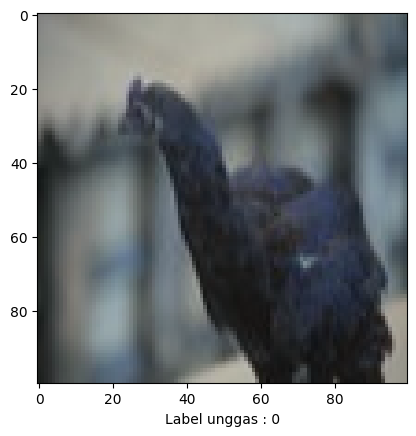

Hasil prediksi model: 0
Prediksi benar!


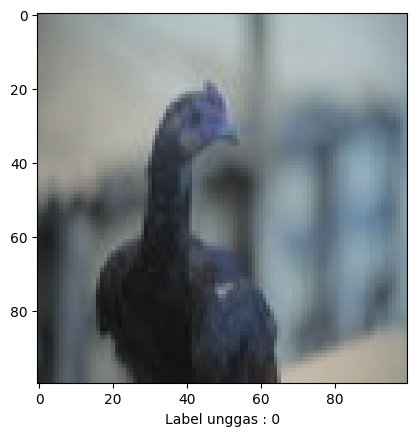

Hasil prediksi model: 0
Prediksi benar!


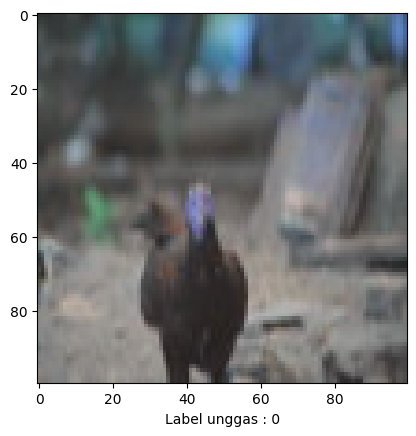

Hasil prediksi model: 1
Prediksi salah!


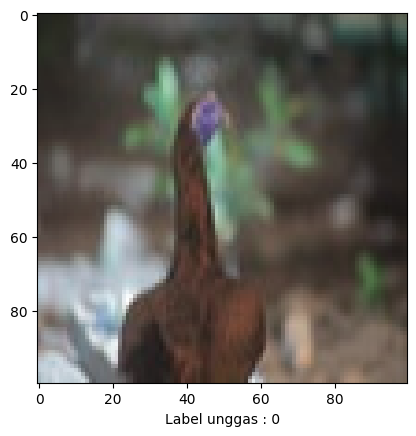

Hasil prediksi model: 0
Prediksi benar!


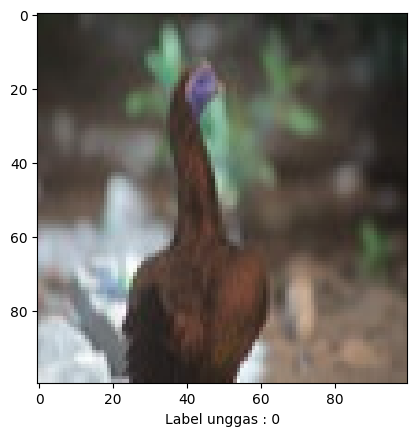

Hasil prediksi model: 0
Prediksi benar!


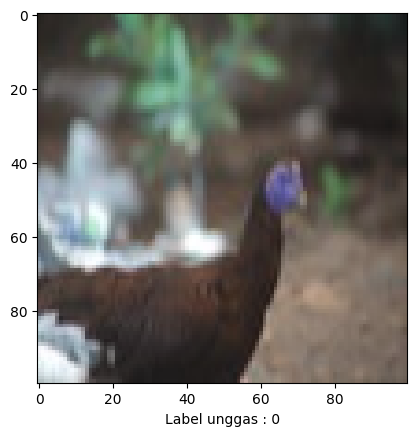

Hasil prediksi model: 0
Prediksi benar!


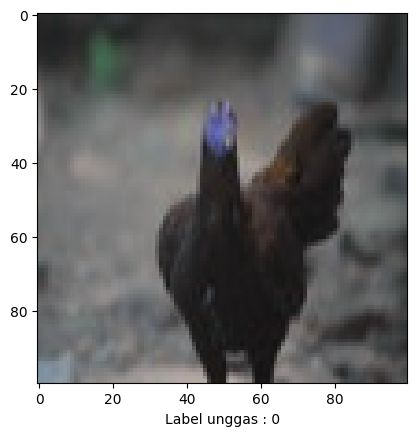

Hasil prediksi model: 0
Prediksi benar!


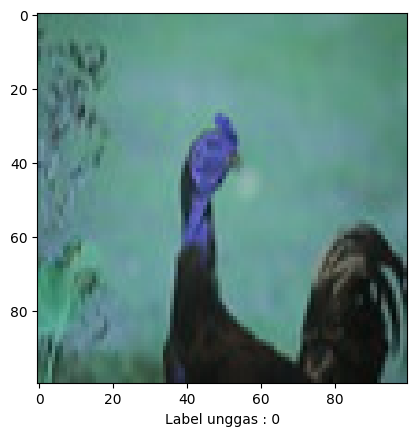

Hasil prediksi model: 0
Prediksi benar!


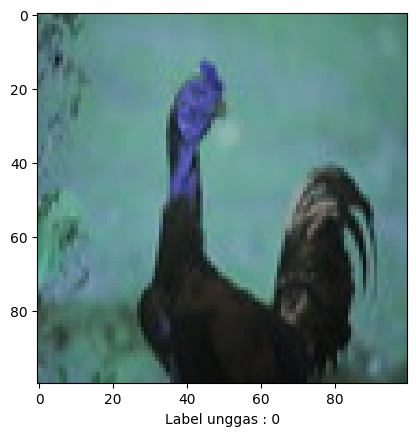

Hasil prediksi model: 0
Prediksi benar!


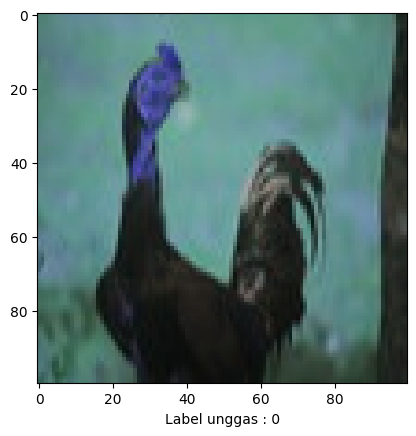

Hasil prediksi model: 0
Prediksi benar!


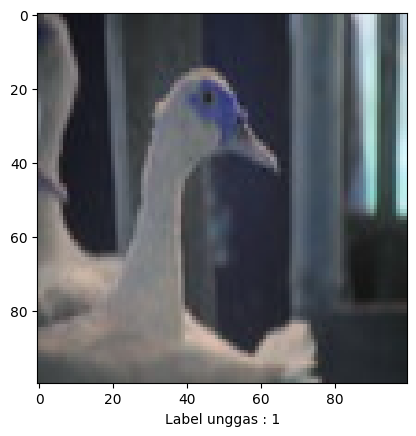

Hasil prediksi model: 0
Prediksi salah!


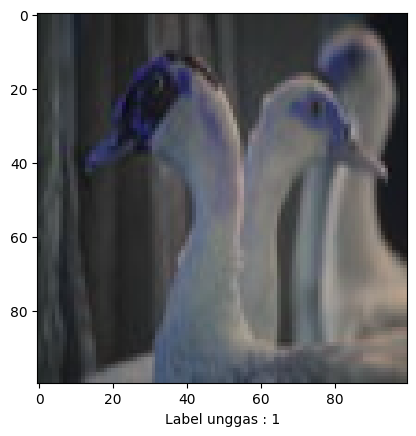

Hasil prediksi model: 1
Prediksi benar!


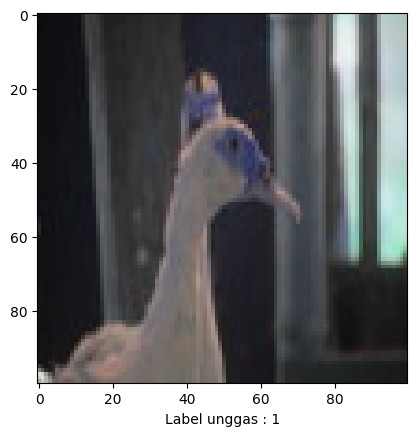

Hasil prediksi model: 2
Prediksi salah!


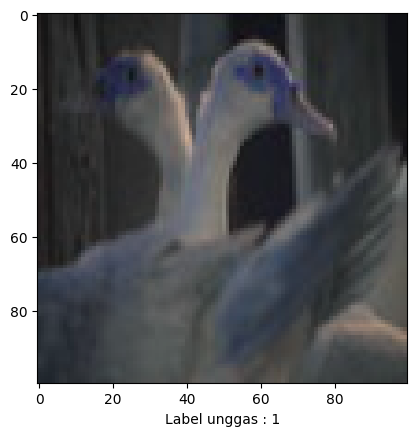

Hasil prediksi model: 1
Prediksi benar!


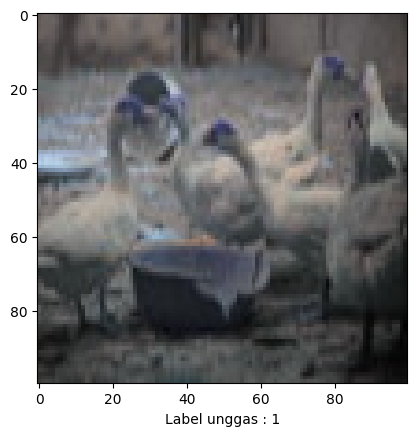

Hasil prediksi model: 1
Prediksi benar!


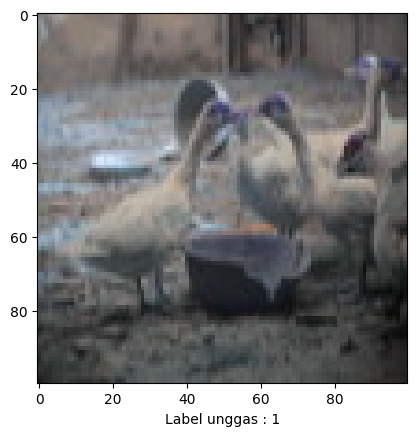

Hasil prediksi model: 1
Prediksi benar!


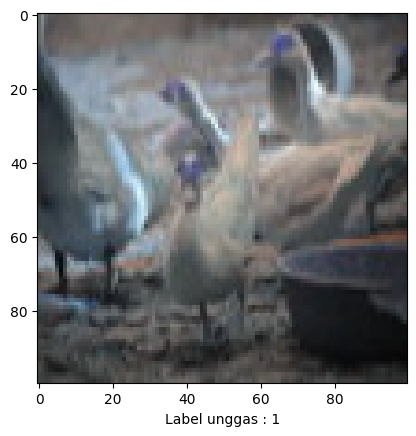

Hasil prediksi model: 1
Prediksi benar!


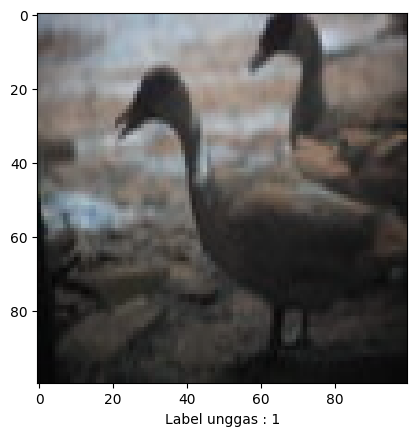

Hasil prediksi model: 0
Prediksi salah!


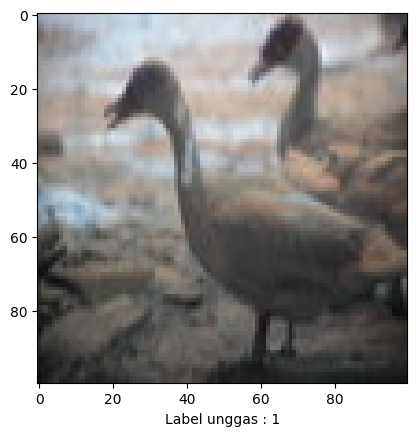

Hasil prediksi model: 0
Prediksi salah!


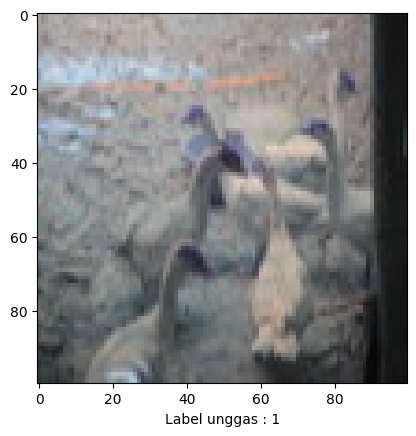

Hasil prediksi model: 0
Prediksi salah!


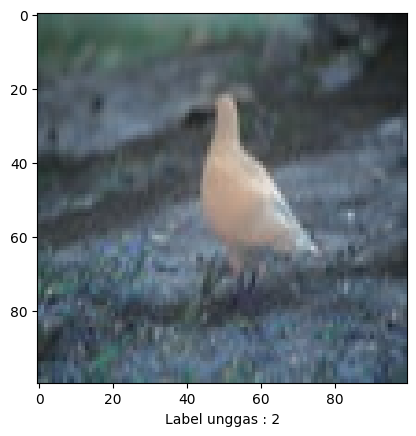

Hasil prediksi model: 2
Prediksi benar!


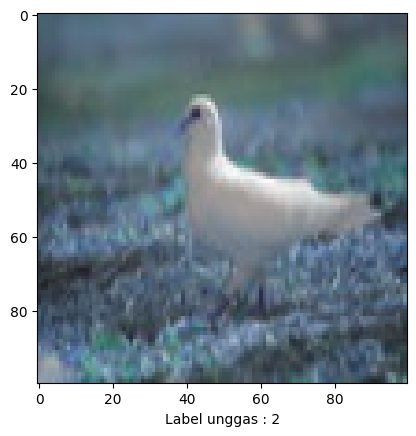

Hasil prediksi model: 2
Prediksi benar!


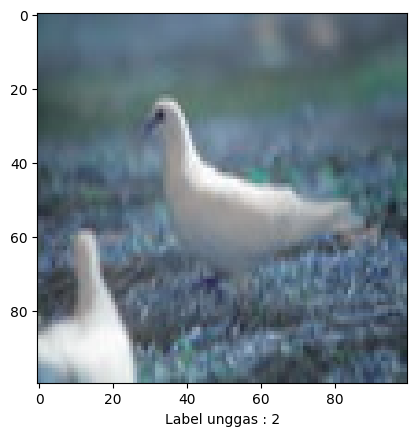

Hasil prediksi model: 2
Prediksi benar!


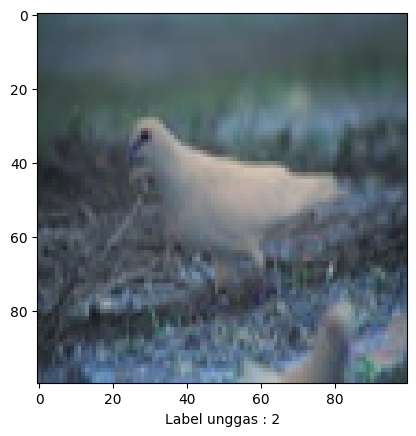

Hasil prediksi model: 2
Prediksi benar!


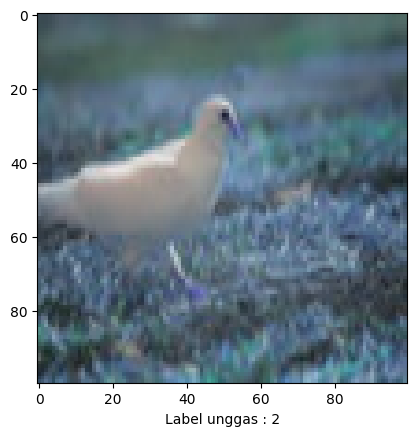

Hasil prediksi model: 2
Prediksi benar!


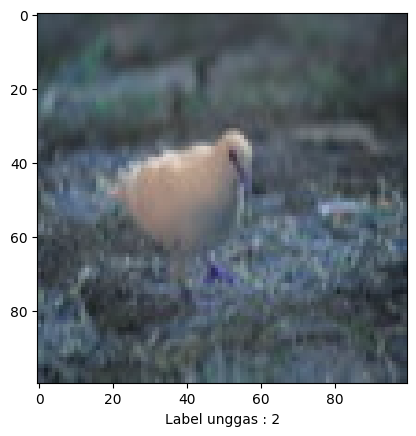

Hasil prediksi model: 2
Prediksi benar!


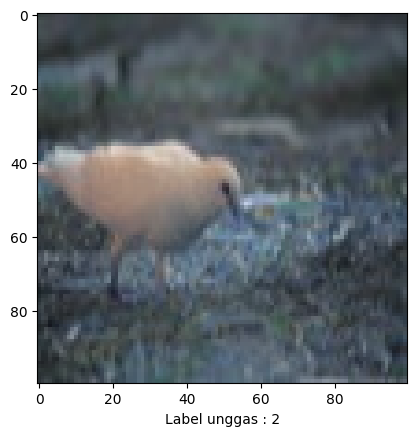

Hasil prediksi model: 2
Prediksi benar!


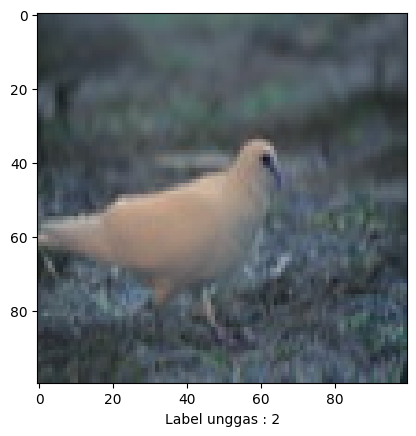

Hasil prediksi model: 2
Prediksi benar!


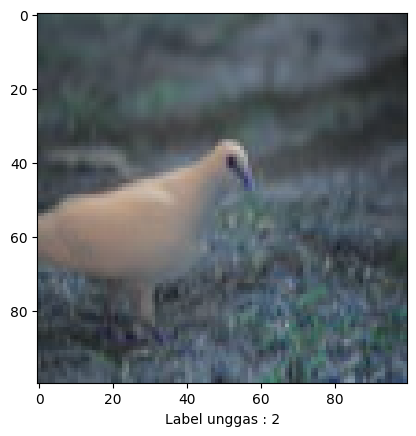

Hasil prediksi model: 2
Prediksi benar!


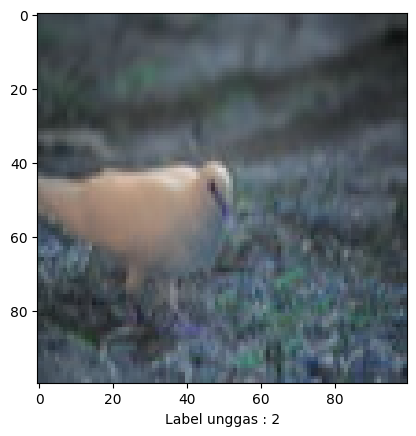

Hasil prediksi model: 2
Prediksi benar!


In [34]:
import matplotlib.pyplot as plt

# Memprediksi 50 gambar dari Data Uji.
n_images = 50
test_images = X_uji[:n_images]
test_label = y_uji[:n_images]

predictions = model.predict(test_images)

# Determine the number of test images available
n_images_available = min(n_images, test_images.shape[0])

# Menampilkan gambar dan prediksi model.
correct_predictions = 0  # Jumlah prediksi benar
incorrect_predictions = 0  # Jumlah prediksi salah
for i in range(n_images_available):
    plt.imshow(test_images[i])
    plt.xlabel("Label unggas : %i" % test_label[i])
    plt.show()
    print("Hasil prediksi model: %i" % np.argmax(predictions[i]))

    # Memeriksa apakah prediksi benar atau salah
    if np.argmax(predictions[i]) == test_label[i]:
        print("Prediksi benar!")
        correct_predictions += 1
    else:
        print("Prediksi salah!")
        incorrect_predictions += 1


In [35]:
# Menghitung persentase prediksi benar dan prediksi salah
accuracy_percentage = (correct_predictions / n_images_available) * 100
incorrect_percentage = (incorrect_predictions / n_images_available) * 100

print("Jumlah prediksi benar: %i" % correct_predictions)
print("Jumlah prediksi salah: %i" % incorrect_predictions)
print("Persentase kebenaran: %.2f%%" % accuracy_percentage)
print("Persentase kesalahan: %.2f%%" % incorrect_percentage)

Jumlah prediksi benar: 24
Jumlah prediksi salah: 6
Persentase kebenaran: 80.00%
Persentase kesalahan: 20.00%
